** Referencia: http://dump.jazzido.com/CNPHV2010-RADIO/ **
#### ** Variables en el CENSO 2010 (INDEC) **

- VIVIENDA.INCALCONS	Calidad constructiva de la vivienda
- VIVIENDA.INCALSERV	Calidad de Conexiones a Servicios Básicos
- VIVIENDA.INMAT	Calidad de los materiales
- VIVIENDA.TIPVV	Tipo de vivienda agrupado
- VIVIENDA.TOTHOG	Cantidad de Hogares en la Vivienda
- VIVIENDA.URP	Area Urbano - Rural
- VIVIENDA.V00	Tipo de vivienda colectiva
- VIVIENDA.V01	Tipo de vivienda particular
- VIVIENDA.V02	Condición de ocupación
- HOGAR.ALGUNBI	Al menos un indicador NBI
- HOGAR.H05	Material predominante de los pisos
- HOGAR.H06	Material predominante de la cubierta exterior del techo
- HOGAR.H07	Revestimiento interior o cielorraso del techo
- HOGAR.H08	Tenencia de agua
- HOGAR.H09	Procedencia del agua para beber y cocinar
- HOGAR.H10	Tiene baño / letrina
- HOGAR.H11	Tiene botón, cadena, mochila para limpieza del inodoro
- HOGAR.H12	Desagüe del inodoro
- HOGAR.H13	Baño / letrina de uso exclusivo
- HOGAR.H14	Combustible usado principalmente para cocinar
- HOGAR.H15	Total de habitaciones o piezas para dormir
- HOGAR.H19A	Heladera
- HOGAR.H19B	Computadora
- HOGAR.H19C	Teléfono celular
- HOGAR.H19D	Teléfono de línea
- HOGAR.INDHAC	Hacinamiento
- HOGAR.NHOG	Número del hogar en la vivienda
- HOGAR.PROP	Régimen de tenencia
- HOGAR.TOTPERS	Total de Personas en el Hogar
- PERSONA.CONDACT	Condición de actividad
- PERSONA.EDADAGRU	Edad en grandes grupos
- PERSONA.EDADQUI	Edades quinquenales
- PERSONA.P01	Relación o parentesco con el jefe(a) del hogar
- PERSONA.P02	Sexo
- PERSONA.P03	Edad
- PERSONA.P05	En que país nació
- PERSONA.P07	Sabe leer y escribir
- PERSONA.P08	Condición de asistencia escolar
- PERSONA.P09	Nivel educativo que cursa o cursó
- PERSONA.P10	Completó el nivel
- PERSONA.P12	Utiliza computadora

# Required libraries

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import simpledbf
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Functions

In [3]:
def getEPHdbf(censusstring):
    print ("Downloading", censusstring)
    ### First I will check that it is not already there
    if not os.path.isfile("data/Individual_" + censusstring + ".DBF"):
        if os.path.isfile('Individual_' + censusstring + ".DBF"):
            # if in the current dir just move it
            if os.system("mv " + 'Individual_' + censusstring + ".DBF " + "data/"):
                print ("Error moving file!, Please check!")
        # otherwise start looking for the zip file
        else:
            if not os.path.isfile("data/" + censusstring + "_dbf.zip"):
                if not os.path.isfile(censusstring + "_dbf.zip"):
                    os.system(
                        "curl -O http://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/" + censusstring + "_dbf.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + censusstring + "_dbf.zip " + "data/")
            ### unzip the csv
            os.system("unzip " + "data/" + censusstring + "_dbf.zip -d data/")

    if not os.path.isfile("data/" + 'Individual_' + censusstring + ".DBF"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, creating CSV file")

    trimestre = censusstring

    dbf = simpledbf.Dbf5('data/Individual_' + trimestre + '.dbf',codec='latin1')
    df_def = dbf.to_dataframe()

#     df_def_i = df_def.loc[df_def.REGION == 1, ['CODUSU','NRO_HOGAR','PONDERA','CH03','CH04',
#                                             'CH06','CH07','CH08','CH09','CH12','CH13',
#                                             'CH15','CH16','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC',
# #                                             'PP02C2','PP02C3','PP02C4','PP02C5','PP02C6','PP02C7','PP02C8',
# #                                             'PP02E','PP02H','PP02I','PP03C','PP03D','PP3E_TOT','PP3F_TOT',
# #                                             'PP03G','PP03H','PP03I','PP03J','INTENSI','PP04A',
# #                                             'PP04B1','PP04B2',
# #                                             'PP04C','PP04C99','PP04G','PP05C_1','PP05C_2',
# #                                             'PP05C_3','PP05E','PP05F','PP05H','PP06A','PP06C','PP06D',
# #                                             'PP06E','PP06H','PP07A','PP07C','PP07D','PP07E','PP07F1',
# #                                             'PP07F2','PP07F3','PP07F4','PP07F5','PP07G1','PP07G2','PP07G3',
# #                                             'PP07G4','PP07G_59','PP07H','PP07I','PP07J','PP07K','PP08D1',
# #                                             'PP08D4','PP08F1','PP08F2','PP08J1','PP08J2','PP08J3','PP09A',
# #                                             'PP10A','PP10C','PP10D',
# #                                             'PP10E','PP11A','PP11B1','PP11C','PP11C99',
# #                                             'PP11L','PP11L1','PP11M','PP11N','PP11O','PP11P','PP11Q','PP11R',
# #                                             'PP11S','PP11T','P21',
# #                                             'V2_M','V3_M','V4_M','V5_M','V8_M','V9_M','V10_M',
# #                                             'V11_M','V12_M','V18_M','V19_AM','V21_M',
#                                                'ITF']]

    df_def_i = df_def.loc[df_def.REGION == 1,
                            ['CODUSU',
                            'NRO_HOGAR',
                            'PONDERA',
                            'CH03',
                            'CH04',
                            'CH06',
                            'CH07',
                            'CH08',
                            'CH09',
                            'CH15',
                            'NIVEL_ED',
                            'ESTADO',
                            'CAT_OCUP',
                            'CAT_INAC',
                            'ITF']]

    df_def_i.columns = ['CODUSU',
                            'NRO_HOGAR',
                            'PONDERA',
                            'Parentesco',
                            'Sexo',
                            'Edad',
                            'Estado_Civil',
                            'Cobertura_Medica',
                            'Sabe_leer',
                            'Lugar_Nac',
                            'NIVEL_ED',
                            'Trabajo',
                            'CAT_OCUP',
                            'CAT_INAC',
                            'ITF']
    
    
    df_def_i.index =range(0,df_def_i.shape[0])

    df_def_i.to_csv('clean_' + trimestre + '.csv', index = False, encoding='utf-8')
    
    print 'csv file clean_',trimestre,'.csv successfully created in folder /data'
    return

In [4]:
def dummy_variables(data, data_type_dict):
    #Loop over nominal variables.
    for variable in filter(lambda x: data_type_dict[x]=='nominal',
                           data_type_dict.keys()):
 
        #First we create the columns with dummy variables.
        #Note that the argument 'prefix' means the column names will be
        #prefix_value for each unique value in the original column, so
        #we set the prefix to be the name of the original variable.
        dummy_df=pd.get_dummies(data[variable], prefix=variable)
 
        #Remove old variable from dictionary.
        data_type_dict.pop(variable)
 
        #Add new dummy variables to dictionary.
        for dummy_variable in dummy_df.columns:
            data_type_dict[dummy_variable] = 'nominal'
 
        #Add dummy variables to main df.
        data=data.drop(variable, axis=1)
        data=data.join(dummy_df)
 
    return [data, data_type_dict]

In [5]:
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = 0.4, random_state = 200)

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda

# Download data

In [127]:
getEPHdbf('t310')

('Downloading', 't310')
WARNING!!! something is wrong: the file is not there!
csv file clean_ t310 .csv successfully created in folder /data


In [6]:
data = pd.read_csv('clean_t310.csv')
data.head()

,CODUSU,NRO_HOGAR,PONDERA,Parentesco,Sexo,Edad,Estado_Civil,Cobertura_Medica,Sabe_leer,Lugar_Nac,NIVEL_ED,Trabajo,CAT_OCUP,CAT_INAC,ITF
0,302468,1,1287,1,2,20,5,1,1,1,5,3,0,3,4000
1,302468,1,1287,10,2,20,5,1,1,1,5,3,0,3,4000
2,307861,1,1674,1,1,42,2,1,1,2,2,1,3,0,5800
3,307861,1,1674,2,2,44,2,1,1,2,6,1,3,0,5800
4,307861,1,1674,3,1,13,5,1,1,1,3,3,0,3,5800


# Data cleaning

In [7]:
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

In [8]:
data['Parentesco'] = data['Parentesco'].map({1:'Jefe', 2:'Conyuge', 3:'Hijo',4:'Yerno',5:'Nieto', 6:'Madre-padre',
                                             7:'Suegro', 8:'Hermano',9:'Otro', 10:'No-familia'})
data['Sexo'] = data['Sexo'].map({1:0,2:1})

data['Estado_Civil'] = data['Estado_Civil'].map({1:'Unido',2:'Casado',3:'Divorciado',4:'Viudo',5:'Soltero'})
data.Estado_Civil.replace(to_replace=[9], value=[np.nan], inplace=True, axis=None)

data['Sabe_leer'] = data['Sabe_leer'].map({1:'Si',2:'No',3:'Menor'})
data.Sabe_leer.replace(to_replace=[9], value=[np.nan], inplace=True, axis=None) 

data['Lugar_Nac'] = data['Lugar_Nac'].map({1:'Localidad',2:'Otra_loc',3:'Otra_prov',4:'Pais_limit',5:'Otro_pais'})
data.Lugar_Nac.replace(to_replace=[9], value=[np.nan], inplace=True, axis=None) 

data['NIVEL_ED'] = data['NIVEL_ED'].map({1:'Primaria_I',2:'Primaria_C',3:'Secundaria_I',4:'Secundaria_C',
                                          5:'Univ_I',6:'Univ_C',7:'Sin_Edu'})
data['Trabajo'] = data['Trabajo'].map({1:'Ocupado',2:'Desocupado',3:'Inactivo',4:'Menor'})
data.Trabajo.replace(to_replace=[0], value=[np.nan], inplace=True, axis=None) 

data['CAT_OCUP'] = data['CAT_OCUP'].map({0:'No_empleo',1:'Patron',2:'Cuenta_propia', 3:'Empleado',4:'Sin_sueldo'})

In [9]:
data.head()

,ITF,CODUSU,NRO_HOGAR,PONDERA,Parentesco,Sexo,Edad,Estado_Civil,Cobertura_Medica,Sabe_leer,Lugar_Nac,NIVEL_ED,Trabajo,CAT_OCUP,CAT_INAC
0,4000,302468,1,1287,Jefe,1,20,Soltero,1,Si,Localidad,Univ_I,Inactivo,No_empleo,3
1,4000,302468,1,1287,No-familia,1,20,Soltero,1,Si,Localidad,Univ_I,Inactivo,No_empleo,3
2,5800,307861,1,1674,Jefe,0,42,Casado,1,Si,Otra_loc,Primaria_C,Ocupado,Empleado,0
3,5800,307861,1,1674,Conyuge,1,44,Casado,1,Si,Otra_loc,Univ_C,Ocupado,Empleado,0
4,5800,307861,1,1674,Hijo,0,13,Soltero,1,Si,Localidad,Secundaria_I,Inactivo,No_empleo,3


In [10]:
data_type_dict = {'NRO_HOGAR':'nominal','Parentesco':'nominal','Estado_Civil':'nominal','Cobertura_Medica':'nominal',
                 'Sabe_leer':'nominal','Lugar_Nac':'nominal','NIVEL_ED':'nominal','Trabajo':'nominal',
                 'CAT_OCUP':'nominal','CAT_INAC':'nominal'}
dummy_var = dummy_variables(data, data_type_dict)
df = dummy_var[0]
df = df.dropna(axis=0)
weights = ( 1. / df.PONDERA )
df = df.drop('PONDERA',1)

In [11]:
data = data.dropna(axis=0)
g = data.columns.to_series().groupby(data.dtypes).groups
# g

# Correlation Matrix

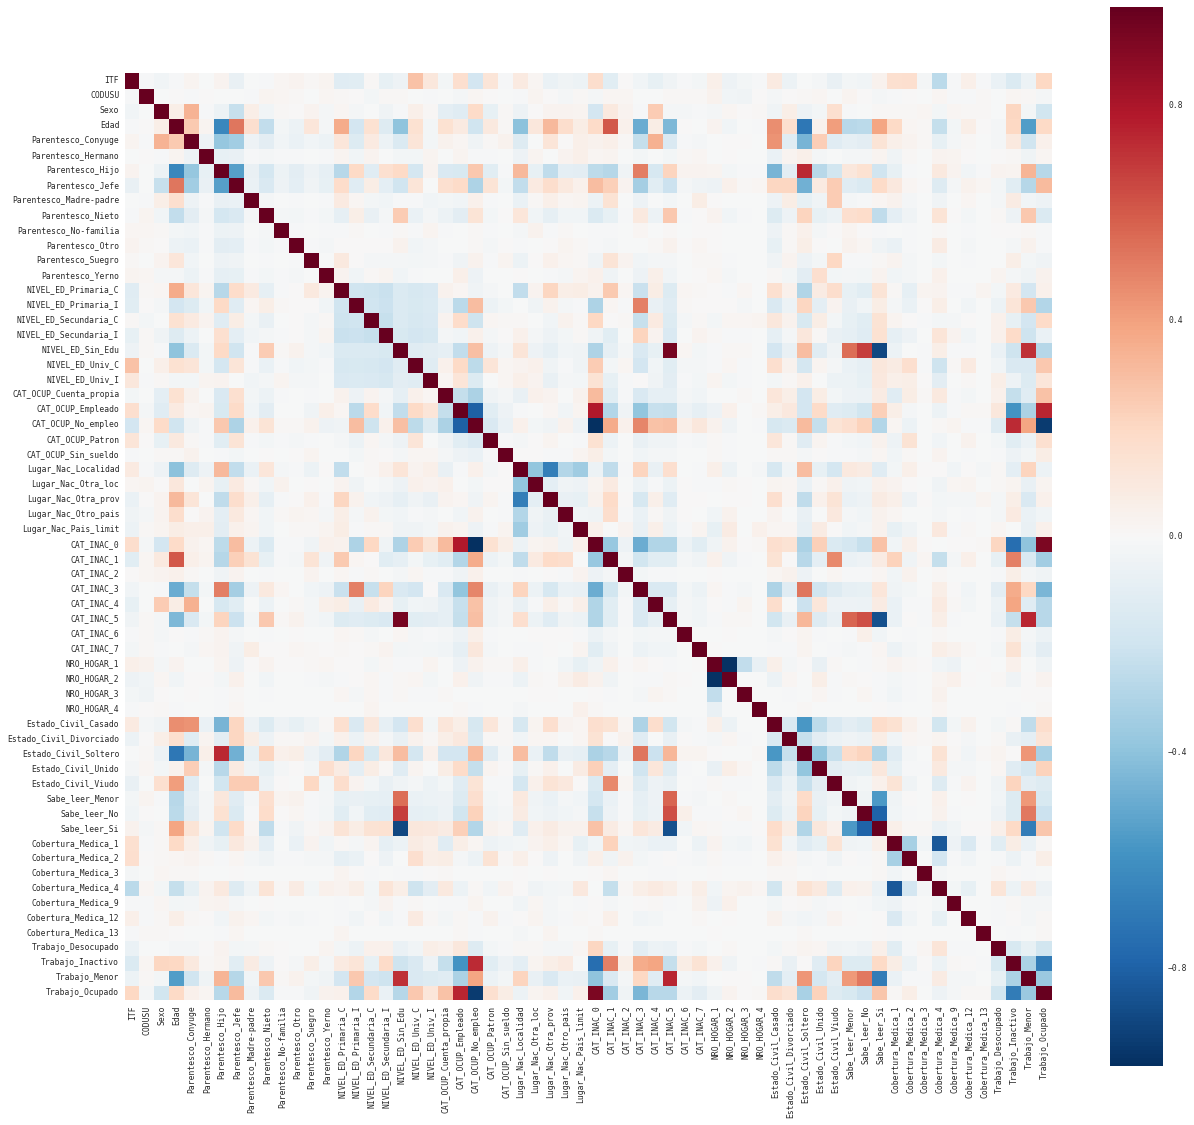

In [12]:
import seaborn as sns
sns.set(context="paper", font="monospace")

corrmat = df.corr()
f, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(corrmat, vmax=.8, square=True)
f.tight_layout()

# Linear Regression (WLS)

In [17]:
import statsmodels.api as sm
Y = np.asarray(df.ITF)
x = df.iloc[:,1:]
X = sm.add_constant(x)
wls_model = sm.WLS(Y,X, weights = weights)
results = wls_model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.234
Model:                            WLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     47.02
Date:                Tue, 22 Nov 2016   Prob (F-statistic):               0.00
Time:                        20:29:15   Log-Likelihood:                -80726.
No. Observations:                8360   AIC:                         1.616e+05
Df Residuals:                    8305   BIC:                         1.619e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
const                    5

# Linear Regression (sklearn)

In [69]:
# sk-learn (Y ~ x) with intercept
from sklearn.linear_model import LinearRegression

R_IS=[]
R_OS=[]

n = 10
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.40)
    
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train, sample_weight = weights[:len(X_train)])
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
    
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 10 times is 0.237468349016
OS R-squared for 10 times is 0.216176069094


# **LOGISTIC REGRESSION**

In [72]:
import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(x, Y, train_size=0.70)
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

In [74]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [77]:
encoded_data, _ = number_encode_features(df)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


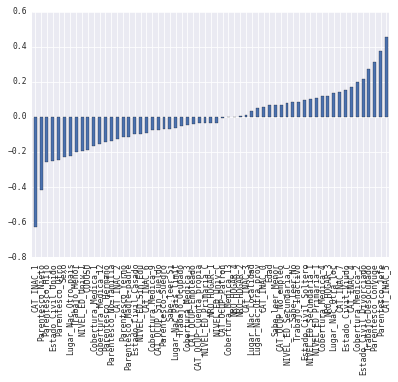

In [81]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(20,20))
# plt.subplot(2,1,1)
# sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
# plt.ylabel("Real value")
# plt.xlabel("Predicted value")
# print "F1 score: %f" % skl.metrics.f1_score(y_test, y_pred)
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort()
# ax = plt.subplot(2,1,2)
coefs.plot(kind="bar")
# plt.show()

# **RIDGE REGRESSION**

In [71]:
#import Quandl
import statsmodels.formula.api as smf
from scipy import stats
from pandas.stats.api import ols
from sklearn import linear_model

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.ix[:,1:],
                                    df.ITF, test_size = 0.4, random_state = 200)

In [73]:
Ridge=linear_model.Ridge(fit_intercept=True, alpha=7.80899583959)

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.255020716457
The R-squared we found for OS Ridge is: 0.220395819262


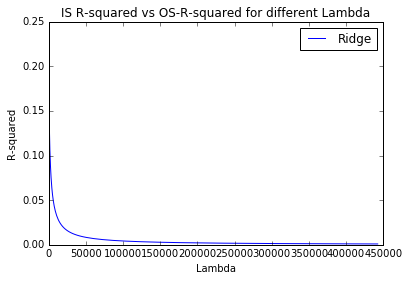

Optimal lambda for Ridge=7.80899583959


In [48]:
#select best lambda for Ridge
lambdas = np.exp(np.linspace(-5,13,200))
lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))

# **LASSO REGRESSION**

In [74]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=1)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.255020716457
The R-squared we found for OS Lasso is: 0.219265327439


In [ ]:
#select lambdas for Lasso 
lambdas=np.exp(np.linspace(-5,6.5,200))
lambda_l_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Lasso={0}'.format(lambda_l_optimal))

## **PCA**

### No funciona bien para multivariate regression. Tenemos muchos datos categoricos

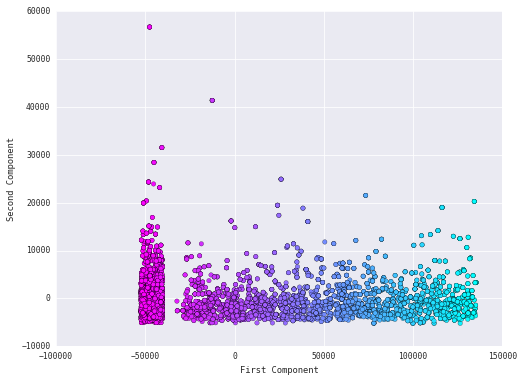

In [15]:
n=2
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(df)
eigenvalues = pca.explained_variance_

plt.figure(2, figsize=(8, 6))
plt.scatter(Xproj[:, 0], Xproj[:, 1], c = X.sum(axis=1), cmap=plt.cm.cool)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

In [181]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

X_ = np.asarray(df)
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X_)
    silhouette_avg = silhouette_score(X_, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is :0.734622497892
For n_clusters = 3, the average silhouette_score is :0.711378747975
For n_clusters = 4, the average silhouette_score is :0.695906072063
For n_clusters = 5, the average silhouette_score is :0.682964255797
For n_clusters = 6, the average silhouette_score is :0.666034528316
For n_clusters = 7, the average silhouette_score is :0.651261959551


# Kmeans Clustering

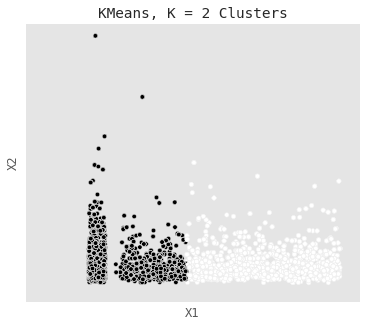

In [182]:
from sklearn.cluster import KMeans

n=2
dd=Xproj

km=KMeans(n_clusters=n)
res=km.fit(dd)

with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 5))
    plt.scatter(dd[:, 0], dd[:, 1], c=res.labels_)
    plt.ylabel('X2')
    plt.xlabel('X1')
    plt.xticks(())
    plt.yticks(())
    plt.title("KMeans, K = {} Clusters".format(n))
    plt.show()

# Gaussian Mixture

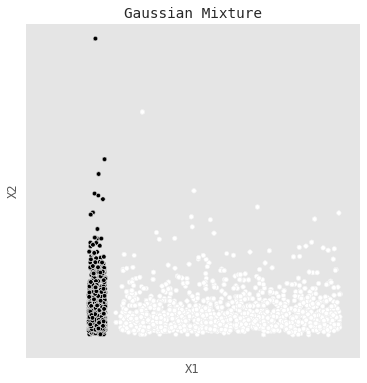

In [183]:
from sklearn.mixture import GaussianMixture

gm=GaussianMixture(n_components=n)
res1=gm.fit(dd)

with plt.style.context('ggplot'):
    plt.figure(figsize=(6,6))
    plt.scatter(dd[:, 0], dd[:, 1], c=res1.predict(dd))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xticks(())
    plt.yticks(())
    plt.title("Gaussian Mixture")
    plt.show()

# Feature selection

## Recursive Feature Elimination

In [184]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
X = x
Y = Y
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

KeyboardInterrupt: 

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
X = x
Y = Y
names = df.columns
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)
 
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))

Features sorted by their rank:
[(1.0, 'CAT_INAC_7'), (2.0, 'NRO_HOGAR_1'), (3.0, 'NRO_HOGAR_2'), (4.0, 'NRO_HOGAR_3'), (5.0, 'Cobertura_Medica_1'), (6.0, 'Cobertura_Medica_9'), (7.0, 'Sabe_leer_Si'), (8.0, 'Cobertura_Medica_4'), (9.0, 'Cobertura_Medica_3'), (10.0, 'Cobertura_Medica_2'), (11.0, 'Cobertura_Medica_12'), (12.0, 'CAT_OCUP_No_empleo'), (13.0, 'CAT_OCUP_Cuenta_propia'), (14.0, 'NIVEL_ED_Univ_I'), (15.0, 'CAT_OCUP_Patron'), (16.0, 'CAT_OCUP_Empleado'), (17.0, 'CAT_INAC_2'), (18.0, 'CAT_INAC_1'), (19.0, 'CAT_INAC_6'), (20.0, 'CAT_INAC_5'), (21.0, 'CAT_INAC_4'), (22.0, 'CAT_INAC_3'), (23.0, 'Lugar_Nac_Pais_limit'), (24.0, 'CAT_INAC_0'), (25.0, 'NIVEL_ED_Sin_Edu'), (26.0, 'NIVEL_ED_Univ_C'), (27.0, 'NIVEL_ED_Primaria_I'), (28.0, 'NIVEL_ED_Secundaria_C'), (29.0, 'Parentesco_Yerno'), (30.0, 'NIVEL_ED_Primaria_C'), (31.0, 'NIVEL_ED_Secundaria_I'), (32.0, 'Trabajo_Inactivo'), (33.0, 'Trabajo_Desocupado'), (34.0, 'Parentesco_Hijo'), (35.0, 'Edad'), (36.0, 'Parentesco_Jefe'), (37.0, 'P

## Univariate Selection

In [24]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
names = df.columns
X = x
Y = Y
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

ValueError: Input X must be non-negative.

## Stability selection

In [25]:
from sklearn.linear_model import RandomizedLasso
 
#using the Boston housing data. 
#Data gets scaled automatically by sklearn's implementation
X = x
Y = Y
names = df.columns
 
rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(X, Y)
 
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True)

Features sorted by their score:
[(1.0, 'Sexo'), (1.0, 'Parentesco_No-familia'), (1.0, 'Parentesco_Madre-padre'), (1.0, 'Parentesco_Hijo'), (1.0, 'NIVEL_ED_Univ_C'), (1.0, 'NIVEL_ED_Sin_Edu'), (1.0, 'NIVEL_ED_Primaria_C'), (1.0, 'Lugar_Nac_Otra_prov'), (1.0, 'Estado_Civil_Divorciado'), (1.0, 'Estado_Civil_Casado'), (1.0, 'Cobertura_Medica_9'), (1.0, 'Cobertura_Medica_13'), (1.0, 'Cobertura_Medica_1'), (1.0, 'CAT_OCUP_Patron'), (1.0, 'CAT_OCUP_No_empleo'), (1.0, 'CAT_INAC_0'), (0.995, 'CODUSU'), (0.985, 'NIVEL_ED_Secundaria_I'), (0.985, 'CAT_INAC_5'), (0.98, 'Parentesco_Nieto'), (0.98, 'Lugar_Nac_Localidad'), (0.98, 'Cobertura_Medica_2'), (0.975, 'Sabe_leer_No'), (0.965, 'Lugar_Nac_Otro_pais'), (0.965, 'ITF'), (0.96, 'CAT_INAC_1'), (0.95, 'NRO_HOGAR_2'), (0.945, 'Cobertura_Medica_4'), (0.935, 'NRO_HOGAR_4'), (0.93, 'Parentesco_Otro'), (0.93, 'Edad'), (0.925, 'NIVEL_ED_Primaria_I'), (0.91, 'Cobertura_Medica_3'), (0.89, 'CAT_INAC_3'), (0.875, 'Estado_Civil_Unido'), (0.87, 'Trabajo_Menor'),

# Example: running the methods side by side

In [67]:
# !pip install minepy

from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from minepy import MINE
 
X = x.values
Y = Y
    
names = df.columns
 
ranks = {}
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)
 
ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
 
 
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
 
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)
 
#stop the search when 5 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
 
rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
 
 
f, pval  = f_regression(X, Y, center=True)
ranks["Corr."] = rank_to_dict(f, names)
 
mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
    mine.compute_score(X[:,i], Y)
    m = mine.mic()
    mic_scores.append(m)
 
ranks["MIC"] = rank_to_dict(mic_scores, names) 
 
 
r = {}
for name in names[:-1]:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
feat_ranking = pd.DataFrame(ranks)
cols = feat_ranking.columns.tolist()
cols.insert(0, cols.pop(cols.index('Mean')))
feat_ranking = feat_ranking.ix[:, cols]
feat_ranking.sort_values(['Mean'], ascending=False)

,Mean,Corr.,Lasso,Linear reg,MIC,RF,RFE,Ridge,Stability
NIVEL_ED_Sin_Edu,0.69,1.00,0.79,0.16,0.49,0.25,0.79,1.00,1.00
Cobertura_Medica_3,0.57,0.86,0.13,0.04,1.00,0.13,0.96,0.56,0.90
Cobertura_Medica_1,0.52,0.30,0.81,0.04,0.46,0.03,0.89,0.64,1.00
CAT_OCUP_No_empleo,0.48,0.17,0.71,0.12,0.16,0.06,0.80,0.81,1.00
CAT_INAC_7,0.45,0.04,0.30,1.00,0.25,0.00,1.00,0.28,0.70
Parentesco_Hijo,0.43,0.06,0.63,0.03,0.15,0.04,0.66,0.88,1.00
Cobertura_Medica_9,0.43,0.04,0.73,0.04,0.21,0.01,0.91,0.51,1.00
NRO_HOGAR_2,0.41,0.01,0.14,1.00,0.03,0.00,1.00,0.18,0.89
CAT_OCUP_Patron,0.39,0.00,0.50,0.12,0.06,0.00,0.86,0.60,1.00
Trabajo_Menor,0.38,0.48,0.75,0.00,0.33,0.05,0.21,0.38,0.84
